 #Project: Classifying Heart Disease

##1. Introduction

In this project, we'll be delving into a real-life dataset to explore how machine learning can help solve pressing issues that affect people's lives. Specifically, we'll be working with the Heart Disease Data Set from the UCI Machine Learning Repository, which was compiled by the Cleveland Clinic Foundation. This dataset contains valuable information on various patient characteristics, such as age and chest pain, and aims to predict the presence of heart disease in an individual.

We'll walk through the entire machine learning pipeline, from exploring the dataset to building a refined classification model. Since classification problems are more prevalent than regression problems, this project will provide valuable practice in this area. Overall, this project serves as an excellent example of how machine learning can be applied to tackle real-world problems and improve people's lives.
We will be working with The Heart Disease Data Set from the UCI Machine Learning Repository(https://archive.ics.uci.edu/dataset/45/heart+disease). 

In [ ]:
#2· Exploring the Dataset

In [14]:
#Lets import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
heart = pd.read_csv('heart_disease.csv')

In [5]:
#Lets see the columns in the dataset 
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


The dataset includes 14 attributes, which are:

age: age in years
sex: sex (1 = male; 0 = female)
cp: chest pain type
1: typical angina
2: atypical angina
3: non-anginal pain
4: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholesterol in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
0: normal
1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise-induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST-segment
1: upsloping
2: flat
3: downsloping
ca: number of major vessels (0-3) colored by fluoroscopy
thal: thallium stress test
3: normal
6: fixed defect
7: reversible defect
present: diagnosis of heart disease based on angiographic disease status
0: < 50% diameter narrowing
1: > 50% diameter narrowing
As noted earlier, all the columns in the dataset are represented as numeric. In the following sections we will explore these columns in more detail to gain a better understanding of the dataset.

In [6]:
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Before building any models, it is important to explore and prepare the dataset. This includes converting categorical variables into dummy variables, centering and scaling variables, and identifying predictors that may be informative for classification.

In this analysis, we will explore the heart dataset and select potential predictors to include in a linear model. We will also examine how the predictors are distributed based on the outcome, which can provide insights for model building.



In [7]:
# Check missing values
heart.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
present       0
dtype: int64

The data types for most columns in the dataset are correct, except for ca and thal. Let's investigate why this is the case.

In [8]:
# Check the unique values of 'ca' and 'thal' columns
cols = ['ca', 'thal']

for col in cols:
    print(f'{col}: {heart[col].unique()}')

ca: ['0.0' '3.0' '2.0' '1.0' '?']
thal: ['6.0' '3.0' '7.0' '?']


The reason why the data type of ca and thal is object instead of a numerical type is because the columns contain values that are not numerical. Specifically, the unique() function has returned a list of values that includes a ? character. This indicates that there are missing values in these columns, which are represented by ?.

To determine how we can handle these missing values, we can check the frequency distribution of the values in these columns using value_counts(). This will give us an idea of how many missing values there are and how they are distributed among the other values in the column.

In [9]:
# Count the frequency
for col in cols:
    display(heart[col].value_counts())

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

The reason why ca and thal columns have an object data type is because they contain ? values, which are non-numeric. To deal with these missing values, we will replace them with the mode of the respective column. Since ca is a discrete variable, replacing ? with the mean or median may not be appropriate. Instead, the mode, which represents the most frequently occurring value, will be used to replace ?. The same approach will be used for thal, which is a categorical variable.

In [10]:
# Replace '?' values in 'ca' and thal' columns with mode
for col in cols:
    col_mode = heart[col].mode()[0]
    heart[col] = heart[col].replace('?', col_mode).astype(float)
    
# Count the frequency after replacing '?'
for col in cols:
    display(heart[col].value_counts())

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

In [11]:
# Check the data type again
heart.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca            float64
thal          float64
present         int64
dtype: object

In [12]:
# Calculate descriptive statistics
heart.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


The describe() method has provided some descriptive statistics about the numerical columns in the heart dataframe:

age: The average age of the patients is 54.4 years with a standard deviation of 9 years. The age ranges from 29 to 77 years.
sex: The majority of patients are male (68%).
cp: The chest pain type ranges from 1 to 4 and the average chest pain type is 3.16 (referring to pain type value 3 i.e, non-anginal pain).
trestbps: The resting blood pressure ranges from 94 to 200 with an average of 131.7 mm Hg.
chol: The serum cholesterol ranges from 126 to 564 mg/dl with an average of 246.7 mg/dl.
fbs: The fasting blood sugar level ranges from 0 to 1 with an average of 0.15.
restecg: The resting electrocardiographic results range from 0 to 2 with an average of 0.99.
thalach: The maximum heart rate achieved ranges from 71 to 202 beats per minute with an average of 149.6 bpm.
exang: Exercise-induced angina ranges from 0 to 1 with an average of 0.33.
oldpeak: ST depression induced by exercise relative to rest ranges from 0 to 6.2 with an average of 1.04.
slope: The slope of the peak exercise ST segment ranges from 1 to 3 with an average of 1.6.
ca: The number of major vessels (0-3) colored by fluoroscopy ranges from 0 to 3 with an average of 0.66.
thal: A blood disorder called thalassemia ranges from 3 to 7 with an average of 4.7.
present: The presence of heart disease ranges from 0 (no heart disease) to 1 (heart disease) with an average of 0.46.
These descriptive statistics offer a broad summary of the numerical variables present in the dataset. Notably, some variables, namely sex, cp, fbs, restecg, exang, slope, ca, thal, and present, are categorical or discrete variables, whereas age, trestbps, chol, thalach, and oldpeak are continuous variables, although they are recorded as integers.

Let's now examine the distribution of our continuous variables using histograms.

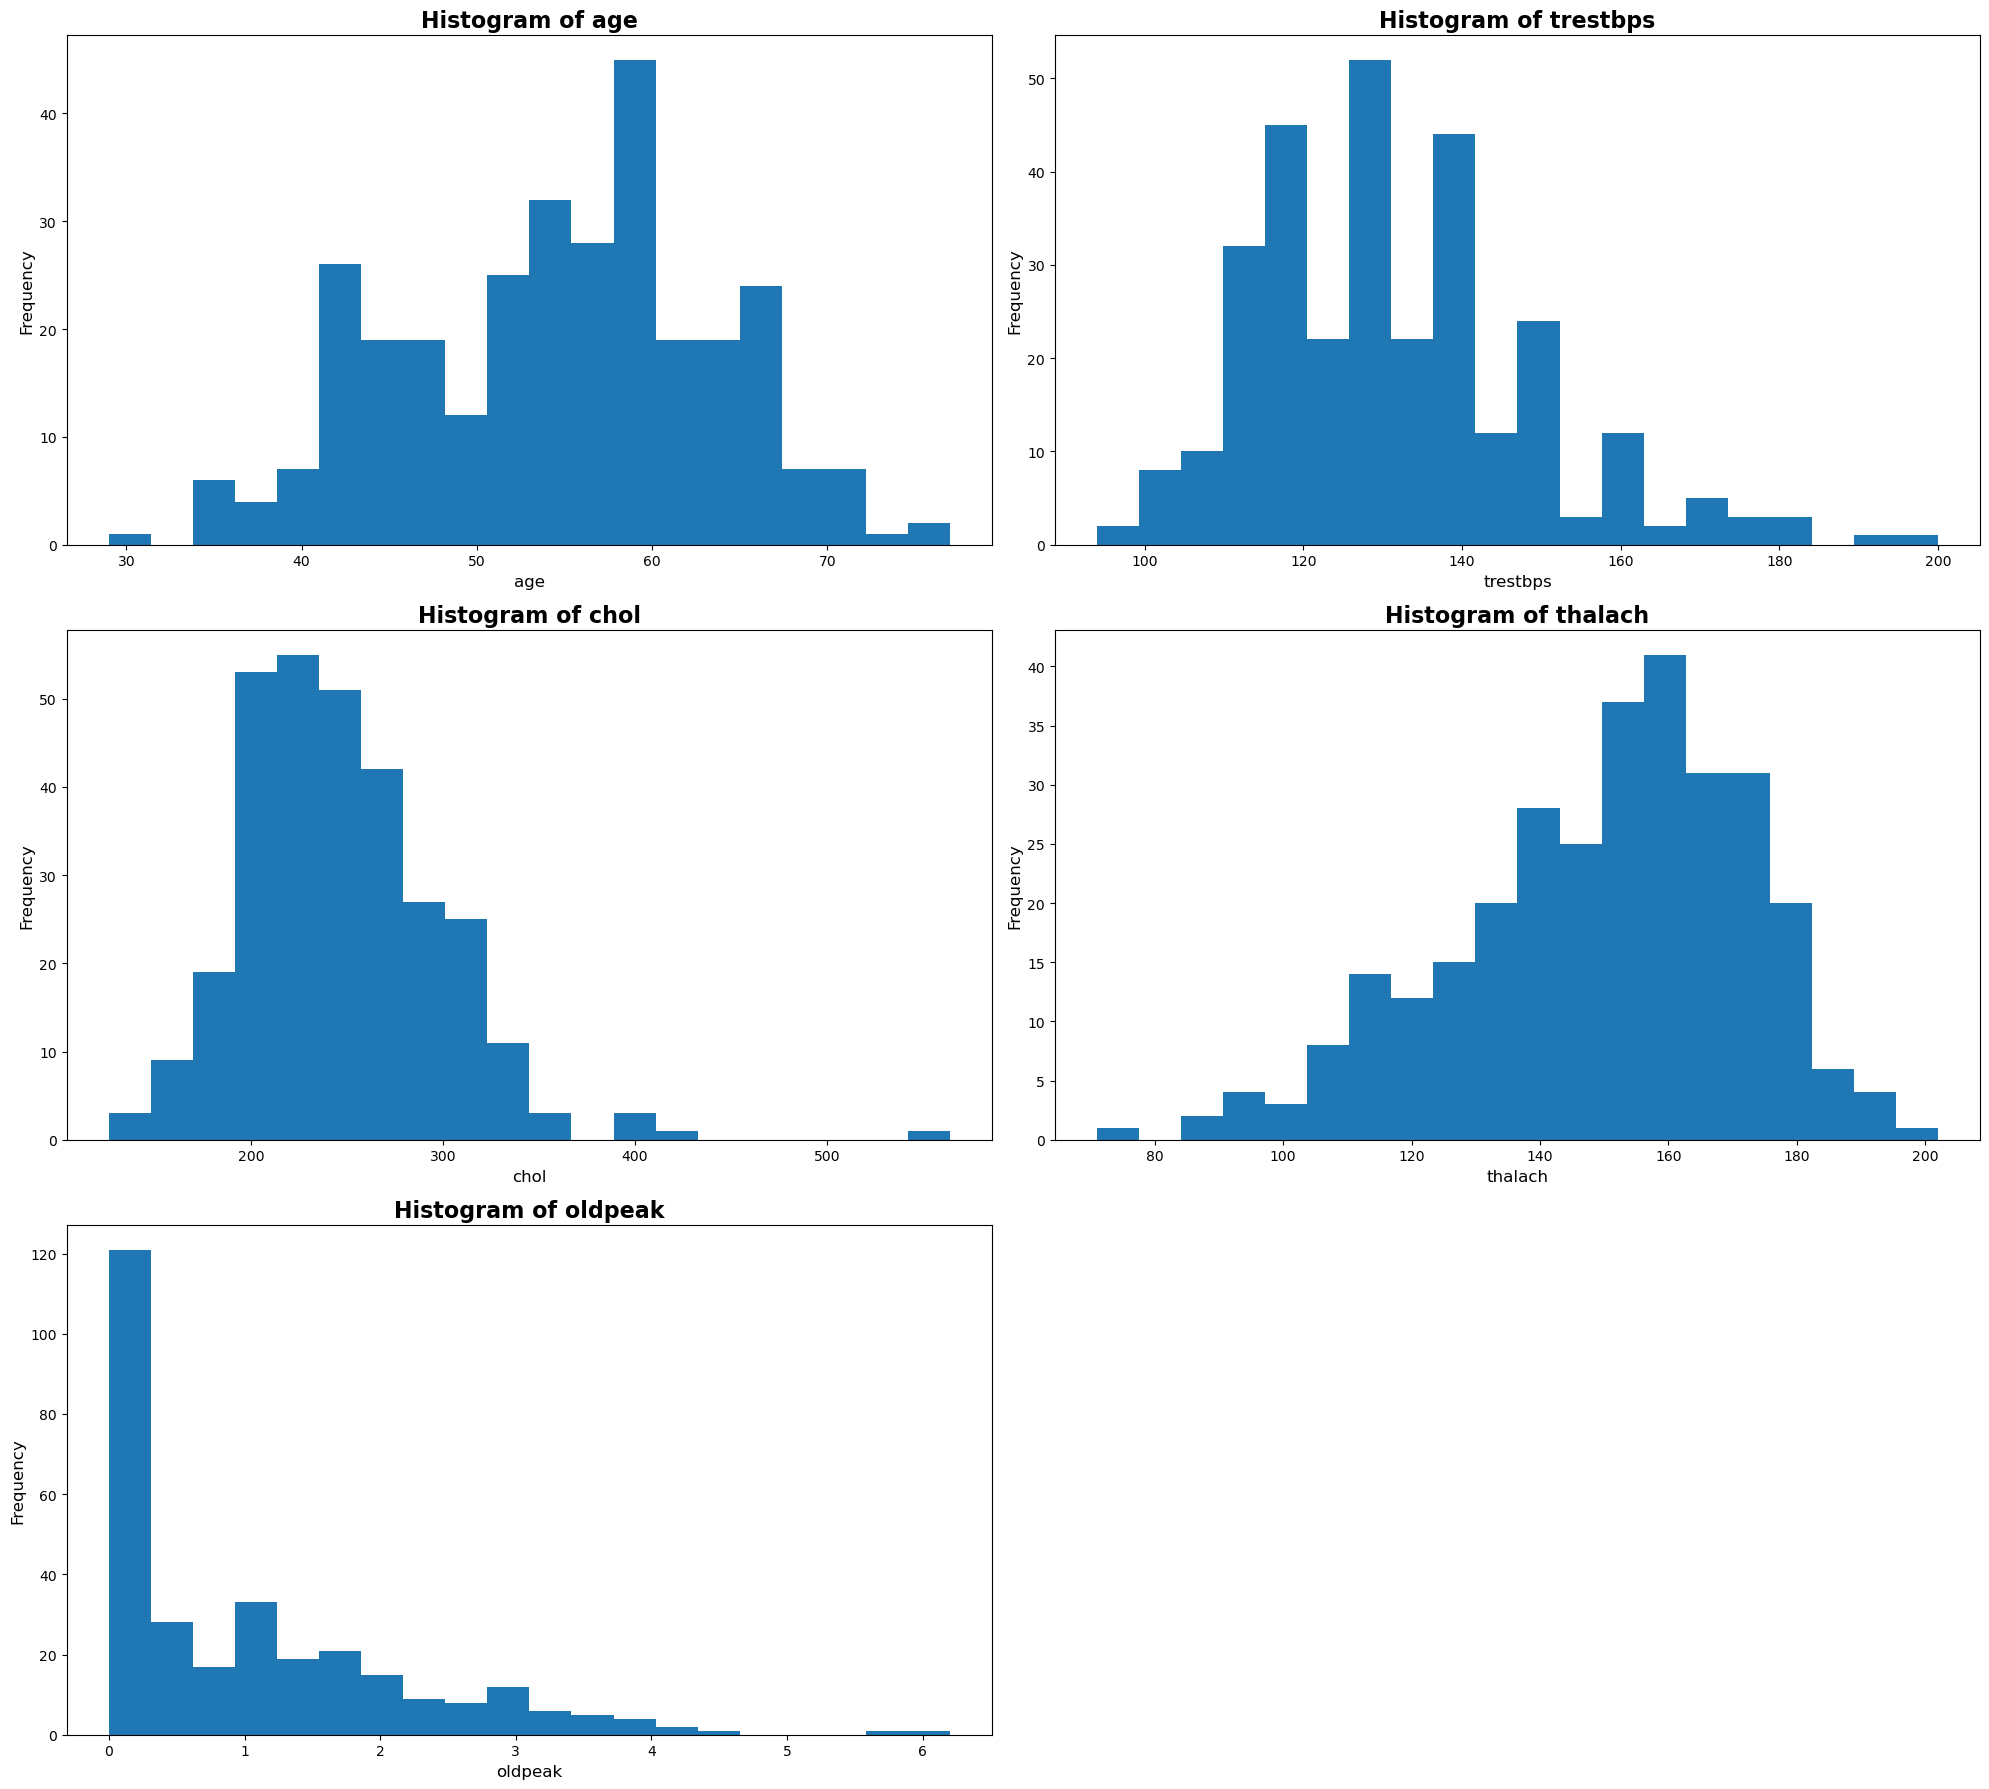

In [15]:
# List of continuous variables
cont_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Define number of rows and columns for the subplots
num_rows = 3
num_cols = 2

# Set up the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 18))

# Loop over each continuous column to create a histogram
for i, col in enumerate(cont_cols):
    # Calculate the row and column index for the current subplot
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Create a histogram of the column values in the current subplot
    ax = axes[row_idx, col_idx]
    ax.hist(heart[col], bins=20)
    
    # Add labels for the x and y axes
    ax.set_xlabel(col, size=12)
    ax.set_ylabel('Frequency', size=12)
    
    # Add a title for the plot
    ax.set_title(f'Histogram of {col}', size=16, weight='bold')

# If there are not enough columns to fill in the last row, remove the empty plot
if len(cont_cols) % num_cols != 0:
    blank_ax = axes[num_rows-1, num_cols-1]
    blank_ax.axis('off')

fig.tight_layout()
plt.show()

Based on histograms of the continuous columns:

Age: The majority of the patients are in the age range of 50-65 years. The age distribution is approximately symmetric and unimodal. The number of patients decreases as the age goes up or down from the central range. There is a single patient below 30 years of age.

Trestbps: The distribution represents the resting blood pressure levels of patients. The distribution appears to be approximately symmetric with a mean around 135 mm Hg. The majority of the patients have blood pressure levels in the range of 120-140 mm Hg. The number of patients decreases as the blood pressure levels go further away from the central range. There are a few patients with extremely low or high blood pressure levels, but their number is relatively small compared to the number of patients with normal blood pressure levels.

Chol: The distribution of serum cholesterol levels is approximately normal with a mean around 250 mg/dl. The distribution is slightly right-skewed indicating that most of the patients have cholesterol levels in the range of 200-300 mg/dl. The number of patients decreases as the cholesterol levels go further away from the central range. There are a few patients with extremely high cholesterol levels.

Thalach: The distribution of maximum heart rate achieved is approximately normal with a mean around 150 bpm. The distribution is slightly left-skewed indicating that most of the patients have heart rates in the range of 140-160 bpm. The number of patients decreases as the heart rate goes further away from the central range. There are a few patients with extremely low or high heart rates.

Oldpeak: The distribution of ST depression induced by exercise relative to rest is right-skewed, with most patients having a value between 0 and 1. There are a few patients with values above 4. The number of patients decreases as the oldpeak value goes further away from the central range.
Let's shift our attention to the categorical variables.

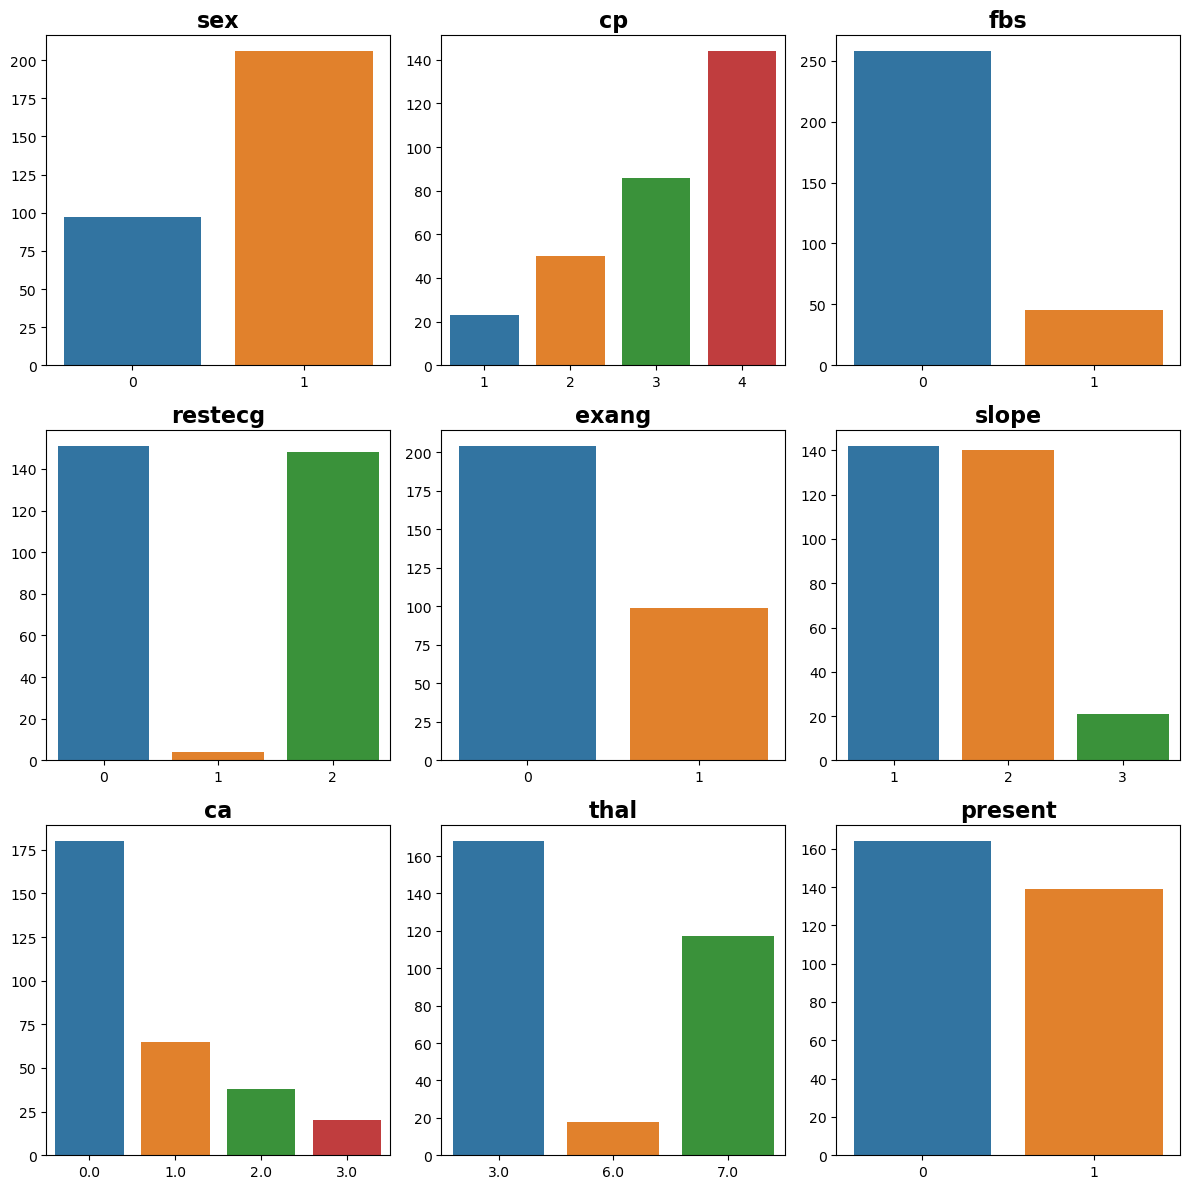

In [16]:
# List of categorical variables
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'present']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Loop through the categorical variables and create a bar plot for each variable
for i, col in enumerate(cat_cols):
    row = i // 3
    col_num = i % 3
    sns.countplot(x=col, data=heart, ax=axes[row][col_num])
    axes[row][col_num].set_title(col, size=16, weight='bold')
    axes[row][col_num].set_xlabel('')
    axes[row][col_num].set_ylabel('')
    
plt.tight_layout()
plt.show()

Here are the observations from the bar plots:

sex: There are 206 male patients and 97 female patients in the dataset.

cp: The majority of patients (144) have type 4 chest pain, followed by type 3 chest pain (86), type 2 chest pain (50), and type 1 chest pain (23).

fbs: Most patients (258) have a fasting blood sugar level <120 mg/dl, while 45 patients have a level >=120 mg/dl.


restecg: Most patients (151) have a normal resting electrocardiographic results, followed by those with ST-T wave abnormality (148), and those with probable or definite left ventricular hypertrophy (4).

exang: Most patients (204) do not have exercise-induced angina, while 99 patients have this condition.

slope: The majority of patients (142) have a downsloping ST segment, followed by those with a flat ST segment (140) and those with an upsloping ST segment (21).

ca: Most patients (180) have no major vessels colored by fluoroscopy, followed by those with 1 (65), 2 (38), and 3 (20) vessels colored.

thal: Most patients (168) have a reversible defect, followed by those with a normal study (117) and those with a fixed defect (18).

present: There are 139 patients who have heart disease and 164 patients who do not have heart disease. The distribution is slightly imbalanced, but not severely so.
Predictors 

##Continuous Predictors

Now that we have visualized the distribution of the individual predictors (both continuous and categorical), let's explore how they are related to the outcome variable present. We can start by examining the relationship between the continuous predictors and the outcome

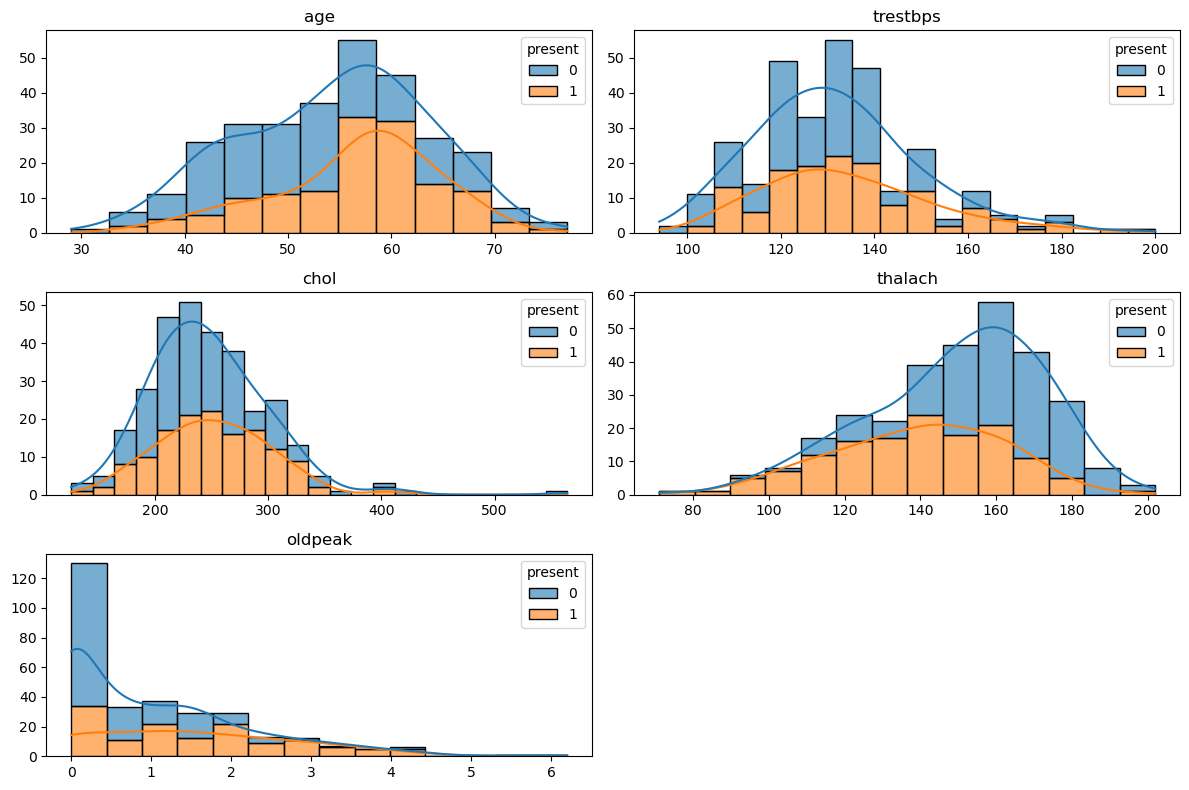

In [17]:
# Define number of rows and columns for the subplots
num_rows = 3
num_cols = 2

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))


# Loop through the continuous variables and create a histogram for each variable
for i, col in enumerate(cont_cols):
    row = i // 2
    col_num = i % 2
    sns.histplot(data=heart, x=col, hue='present', kde=True, ax=axes[row][col_num], alpha=0.6, multiple='stack')
    axes[row][col_num].set_title(col)
    axes[row][col_num].set_xlabel('')
    axes[row][col_num].set_ylabel('')

# If there are not enough columns to fill in the last row, remove the empty plot    
if len(cont_cols) % num_cols != 0:
    blank_ax = axes[num_rows-1, num_cols-1]
    blank_ax.axis('off')
    
plt.tight_layout()
plt.show()

Based on the histograms for patients with and without heart disease, here are some observations:

Age: The distribution of age for patients with heart disease (orange) is shifted towards the right compared to those without heart disease (blue), indicating that patients with heart disease tend to be older on average.

Trestbps: The distributions for patients with and without heart disease overlap quite a bit, making it difficult to see a clear difference. However, there appears to be a slight shift towards higher blood pressure values for patients with heart disease.

Chol: Similar to trestbps, there is some overlap between the distributions for patients with and without heart disease. However, there is a slight shift towards higher cholesterol values for patients with heart disease.

Thalach: The distribution of maximum heart rate achieved during exercise for patients with heart disease is shifted towards the left compared to those without heart disease. This suggests that patients with heart disease tend to have a lower maximum heart rate.

Oldpeak: There is a noticeable difference in the distributions of oldpeak for patients with and without heart disease. Patients without heart disease tend to have a lower oldpeak value, while those with heart disease have a higher oldpeak value.


We will use the split-apply-combine technique on our list of continuous predictors cont_cols and outcome present. Specifically, we will use the groupby() method to split the data by the present column and then use the agg() method to calculate the mean for each predictor within each group.

This will help us determine which predictors have a meaningful difference between the 0 and 1 classes. By summarizing the continuous predictors using the mean for each class, we can easily compare the difference in means between the two classes. The predictors with the largest differences in means are the most likely to be useful for predicting the outcome.

In [18]:
# Apply Split-Apply-Combine to each predictor group
grouped_cont = heart.groupby('present')[cont_cols].agg('mean')

# Compute the difference in means between present=1 and present=0 for each continuous predictor
diff_cont = grouped_cont.loc[1,:] - grouped_cont.loc[0,:]
diff_cont

age          4.040533
trestbps     5.318345
chol         8.834576
thalach    -19.119056
oldpeak      0.987515
dtype: float64

Based on the result of diff_count, it appears that the predictors age, trestbps, and chol have a relatively larger difference between their means in the two classes (present=0 and present=1), which suggests that they may be useful predictors for predicting the outcome present. 

On the other hand, the predictor thalach has a relatively large negative difference, which suggests that it may be negatively associated with the outcome present. The predictor oldpeak also has a positive difference, but it is relatively smaller compared to the other predictors, so it may not be as useful for predicting the outcome present.


##Categorical Predictors
Let's now explore the relationship between the categorical predictors and the outcome variable.

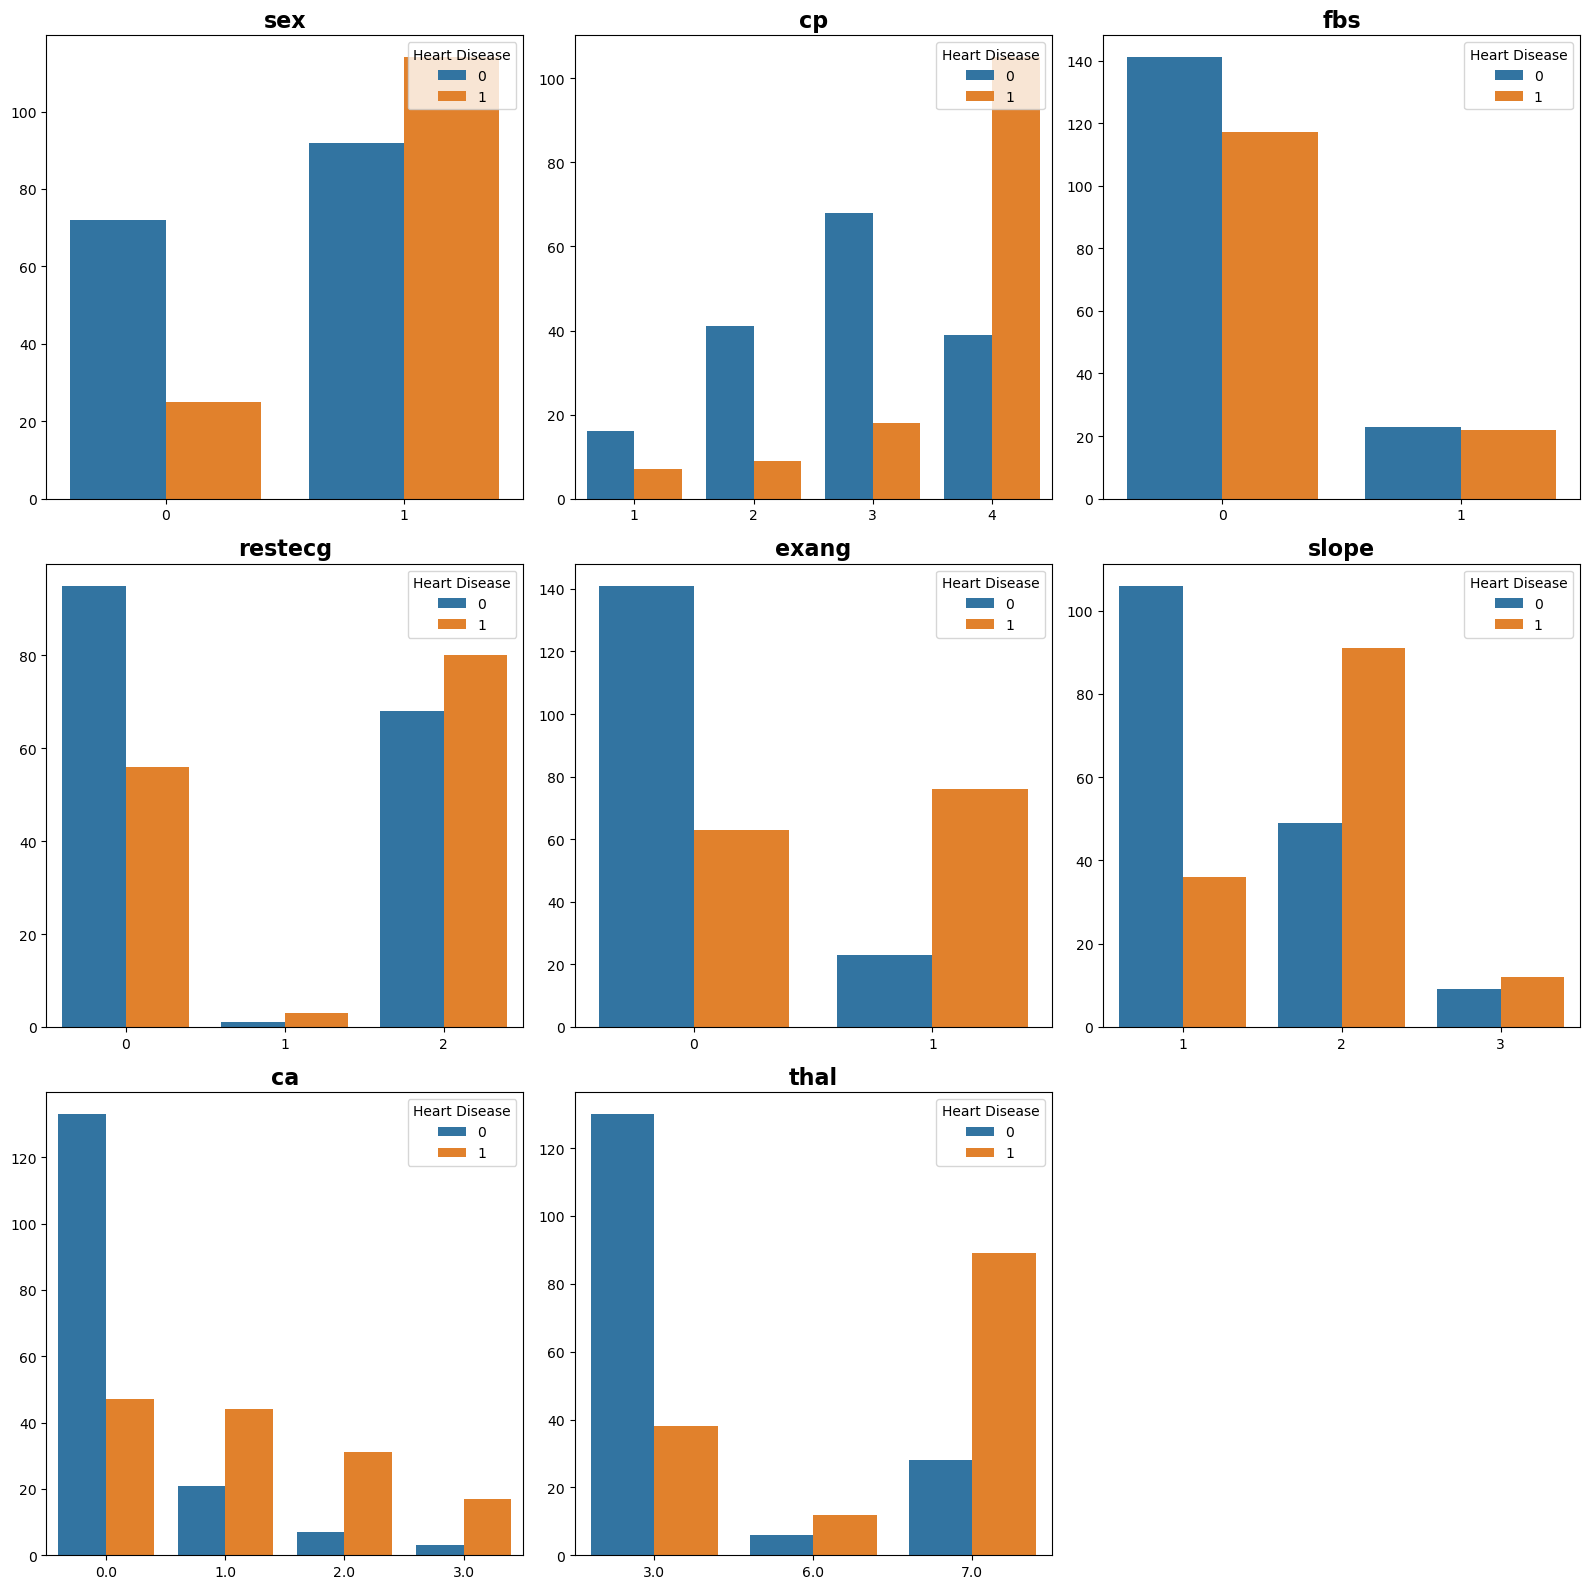

In [19]:
# Exclude the last variable 'present' from 'cat_cols'
cat_cols = cat_cols[:-1]

# Define number of rows and columns for the subplots
num_rows = 3
num_cols = 3

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 16))

# Loop through the categorical variables and create a stacked bar plot for each variable
for i, col in enumerate(cat_cols):
    row = i // num_cols
    col_num = i % num_cols
    cat_plot = sns.countplot(x=col, hue='present', data=heart, ax=axes[row][col_num])
    cat_plot.set_title(col, fontsize=16, fontweight='bold')
    cat_plot.set_xlabel('')
    cat_plot.set_ylabel('')
    cat_plot.legend(title='Heart Disease', loc='upper right')
    
# Remove the empty subplots if necessary
if len(cat_cols) < (num_rows*num_cols):
    for i in range(len(cat_cols), num_rows*num_cols):
        row = i // num_cols
        col_num = i % num_cols
        axes[row][col_num].axis('off')
        
plt.tight_layout()
plt.show()

The stacked bar plots display the proportion of no heart disease (blue) and heart disease (orange) for each category of the predictor variable, in relation to the outcome variable.

From the plots, we can observe the following:

Gender (sex): The proportion of males with heart disease is higher than females.

Chest Pain Type (cp): Patients with typical angina (value 1) have the lowest proportion of heart disease, while those with asymptomatic (value 4) have the highest proportion of heart disease.

Fasting Blood Sugar (fbs): There is not a significant difference in the proportion of heart disease between patients with fasting blood sugar higher or lower than 120 mg/dl.

Resting Electrocardiographic Results (restecg): Patients with a resting electrocardiographic result of probable or definite left ventricular hypertrophy (value 2) have the highest proportion of heart disease.

Exercise Induced Angina (exang): Patients with exercise induced angina have a higher proportion of heart disease compared to those with no exercise induced angina.

Slope of the Peak Exercise ST Segment (slope): Patients with a flat slope of the peak exercise ST segment (value 2) have the highest proportion of heart disease.

Number of Major Vessels Colored by Flourosopy (ca): Patients with no major vessels colored by flourosopy (value 0) have the highest proportion of heart disease.

Thalassemia (thal): Patients with thalassemia value of 7 (reversable defect) have the highest proportion of heart disease.
A contingency table is a table used in statistics to display the frequency distribution of categorical variables. It shows the distribution of one variable in rows and the distribution of another variable in columns. In the case of our problem, we can create a contingency table to show the distribution of each categorical variable in relation to the binary outcome variable present.

To create the contingency table, we will use the crosstab() function from the pandas library. We will specify the predictor variables in the columns and the outcome variable present in the rows.

After creating the contingency table, we can analyze the relationship between each predictor variable and the outcome variable. We can look at the proportions of cases (present) and non-cases (absent) for each category of the predictor variable. If there is a significant difference in the proportions between the categories, then we can conclude that the predictor variable is associated with the outcome variable.

In [20]:
# Create a contingency table for each categorical predictor
for col in cat_cols:
    crosstab = pd.crosstab(heart[col], heart['present'], normalize='index')
    display(crosstab)

present,0,1
sex,,
0,0.742268,0.257732
1,0.446602,0.553398


present,0,1
cp,,
1,0.695652,0.304348
2,0.820000,0.180000
3,0.790698,0.209302
4,0.270833,0.729167


present,0,1
fbs,,
0,0.546512,0.453488
1,0.511111,0.488889


present,0,1
restecg,,
0,0.629139,0.370861
1,0.250000,0.750000
2,0.459459,0.540541


present,0,1
exang,,
0,0.691176,0.308824
1,0.232323,0.767677


present,0,1
slope,,
1,0.746479,0.253521
2,0.350000,0.650000
3,0.428571,0.571429


present,0,1
ca,,
0.0,0.738889,0.261111
1.0,0.323077,0.676923
2.0,0.184211,0.815789
3.0,0.150000,0.850000


present,0,1
thal,,
3.0,0.773810,0.226190
6.0,0.333333,0.666667
7.0,0.239316,0.760684


Based on the results of the contingency tables, we can see that the following predictors may be useful for predicting the outcome present:

sex: There is a relatively large difference in the proportion of outcomes between male and female patients. The proportion of positive outcomes (present = 1) is much higher for male patients than for female patients.

cp: Patients with chest pain type 4 (asymptomatic) have a much higher proportion of positive outcomes than those with other types of chest pain.

restecg: Patients with resting electrocardiographic results of type 1 (having ST-T wave abnormality) have a much higher proportion of positive outcomes than those with other types of results.

exang: Patients with exercise-induced angina have a much higher proportion of positive outcomes (present = 1) than those negative outcomes (present = 0).

ca: Patients with 1, 2, or 3 major vessels colored by fluoroscopy have a much higher proportion of positive outcomes than those with no such vessels.

thal: Patients with a thalassemia type of 6 or 7 have a much higher proportion of positive outcomes than those with type 3.
Useful Predictors
Based on our analysis, the following predictors appear to be good candidates for predicting the outcome present:

age
trestbps
chol
thalach
sex
cp
restecg
exang
ca
thal
Let's compile a list of selected features to be used in our classification model.



In [21]:
# List of selected features
sel_features = ['age', 'trestbps', 'chol', 'thalach', 'sex', 'cp', 'restecg', 'exang', 'ca', 'thal']

##3. Dividing the Data

Now that we have selected some predictors, we must reserve a portion of the data to serve as a final evaluation for our model. Specifically, we will need to create:

A training set to estimate the regression coefficients
A test set to evaluate the model's predictive performance
The training set will be used to fit the model, while the test set will be used to assess how accurately the model can predict outcomes. It is important to ensure that both sets include a mix of cases and non-cases in order to obtain an unbiased evaluation of the model's performance.

To create the training and test sets, we'll divide the dataset using a 70-30 split, with 70% of the data reserved for the training set and 30% for the test set.

In [22]:
# Create freatures X using 'sel_features' and target variable y
X = heart[sel_features]
y = heart['present']

# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)


In [23]:
# Count the number of cases and non-cases in the original dataset
n_cases = sum(y==1)
n_noncases = sum(y==0)

# Count the number of cases and non-cases in the training and test datasets
n_cases_train = sum(y_train==1)
n_cases_test = sum(y_test==1)
n_noncases_train = sum(y_train==0)
n_noncases_test = sum(y_test==0)

# Print the counts
print(f'Original dataset:\n{n_cases} cases, {n_noncases} non-cases\n')
print(f'Training set:\n{n_cases_train} cases, {n_noncases_train} non-cases\n')
print(f'Test set:\n{n_cases_test} cases, {n_noncases_test} non-cases')

Original dataset:
139 cases, 164 non-cases

Training set:
96 cases, 116 non-cases

Test set:
43 cases, 48 non-cases


Based on the results, we can verify that both the training and test datasets contain both cases and non-cases.

##4 · Building the Model

With our heart dataset divided up, let's build the classification model and do some initial assessments. These are some guiding questions that you should think about:

What is the overall training accuracy? Sensitivity and specificity?

Does the model perform better on cases or non-cases? Or does it perform equally well?

These training metrics are overly optimistic estimations of how the model performs, so we should expect slightly worse metrics if the model is general enough. If these metrics are too high, it might be a sign that our model is starting to overfit

In [25]:
# Build the model
model = LogisticRegression(max_iter=800) # set max_iter to avoid ConvergenceWarning

# Fit model on training data
model.fit(X_train, y_train)

# Make predictions on training data
y_pred_train = model.predict(X_train)


Now that our model is trained, let's evaluate its performance by calculating the accuracy, sensitivity, and specificity.

In [26]:

# Calculate accuracy on training data
train_acc = model.score(X_train, y_train)

# Calculate true and false positives as well as true and false negatives
tp = sum((y_train==1) & (y_pred_train==1))
fp = sum((y_train==0) & (y_pred_train==1))
tn = sum((y_train==0) & (y_pred_train==0))
fn = sum((y_train==1) & (y_pred_train==0))

# Calculate sensitivity and specificity
sens_train = tp/(tp+fp)
spec_train = tn/(tn+fp)

print(f'Training Accuracy: {train_acc:.3f}')
print(f'Training Sensitivity: {sens_train:.3f}')
print(f'Training Specificity: {spec_train:.3f}')

Training Accuracy: 0.849
Training Sensitivity: 0.881
Training Specificity: 0.914


Based on the measures of model quality that we have calculated on the training data, here are some observations:

Accuracy: The accuracy of the model on the training data is 0.849, which means that the model correctly predicted the presence or absence of heart disease in 84.9% of the cases in the training dataset. While accuracy is an important measure of model performance, it can be misleading if the dataset is imbalanced or if the cost of false positives and false negatives is different.


Sensitivity: The sensitivity of the model on the training data is 0.881, which means that the model correctly identified 88.1% of the patients with heart disease in the training dataset as having heart disease. This is an important measure, as it indicates the model's ability to correctly identify true positive cases.

Specificity: The specificity of the model on the training data is 0.914, which means that the model correctly identified 91.4% of the patients without heart disease in the training dataset as not having heart disease. This is also an important measure, as it indicates the model's ability to correctly identify true negative cases.

Overall, these measures suggest that the model is performing reasonably well on the training data. However, it's important to keep in mind that these measures were calculated on the same dataset that the model was trained on, which can lead to overfitting.

##5 .Interpreting the Model Coefficients

After building our logistic regression model, we can examine the coefficients to see if they align with our understanding of the problem. The logistic regression model relates the binary outcome to the linear combination of predictors through the link function:

log(EY1−EY)=β0+β1X
The predictors impact the outcome on the log-odds scale. The non-intercept coefficients represent the log-odds ratio for a unit increase in the corresponding predictor:

log(O1O0)=β1
Here, O0
 represents the odds ratio when the predictor is 0, and O1
 represents the odds ratio when the predictor is 1. However, we are usually interested in examining these effects on the odds scale, so we take the exponential function e of both sides to get:

O1=eβ1O0
We can use these coefficients to examine the relationship between our selected predictors and the likelihood of having heart disease.

In [27]:
# Create empty DataFrame to store results
results_df = pd.DataFrame(columns=['feature', 'coef', 'log-odds', 'odds'])

# Calculate coefficients in terms of log-odds
log_odds = [round(coef, 3) for coef in model.coef_[0]]
results_df['log-odds'] = log_odds

# Calculate odds and add to DataFrame
odds = [round(np.exp(coef), 3) for coef in model.coef_[0]]
results_df['odds'] = odds

# Add feature names and coefficients to DataFrame
results_df['feature'] = sel_features
results_df['coef'] = model.coef_[0]

# Print results
results_df

,feature,coef,log-odds,odds
0,age,-0.009740,-0.010,0.990
1,trestbps,0.017073,0.017,1.017
2,chol,0.005876,0.006,1.006
3,thalach,-0.024694,-0.025,0.976
4,sex,1.266966,1.267,3.550
5,cp,0.384444,0.384,1.469
6,restecg,0.133452,0.133,1.143
7,exang,1.047763,1.048,2.851
8,ca,1.449124,1.449,4.259
9,thal,0.322315,0.322,1.380


The coefficients in the coef column represent the change in the log-odds of the target variable present for a one-unit increase in the corresponding predictor variable. In other words, they suggest the direction and strength of the effect of each predictor on the target variable.

age: For a one-unit increase in age, the log-odds of having a heart disease decrease by 0.010, which corresponds to a decrease in odds of having a heart disease by a factor of 0.990. This makes sense as older people are more likely to develop heart diseases than younger people.

trestbps: For a one-unit increase in resting blood pressure, the log-odds of having a heart disease increase by 0.017, which corresponds to an increase in odds of having a heart disease by a factor of 1.017. This makes sense as high blood pressure is a known risk factor for heart disease.

chol: For a one-unit increase in serum cholesterol, the log-odds of having a heart disease increase by 0.006, which corresponds to an increase in odds of having a heart disease by a factor of 1.006. This also makes sense as high cholesterol levels are associated with a higher risk of heart disease.

thalach: For a one-unit increase in maximum heart rate achieved, the log-odds of having a heart disease decrease by 0.025, which corresponds to a decrease in odds of having a heart disease by a factor of 0.975. This is somewhat counterintuitive as one would expect that a higher maximum heart rate achieved would be associated with a lower risk of heart disease. However, it is possible that other factors such as age and fitness level may confound this relationship.

sex: Being male is associated with a 1.264 increase in log-odds of having a heart disease, which corresponds to an increase in odds of having a heart disease by a factor of 3.539. This makes sense as men are generally more prone to heart disease than women.

cp: Chest pain type is associated with a 0.383 increase in log-odds of having a heart disease, which corresponds to an increase in odds of having a heart disease by a factor of 1.466. This also makes sense as chest pain is a symptom of heart disease.

restecg: For a one-unit increase in resting electrocardiographic results, the log-odds of having a heart disease increase by 0.134, which corresponds to an increase in odds of having a heart disease by a factor of 1.143. This may or may not make sense depending on the exact definition of the resting electrocardiographic results used in the model.

exang: Exercise induced angina is associated with a 1.049 increase in log-odds of having a heart disease, which corresponds to an increase in odds of having a heart disease by a factor of 2.856. This makes sense as angina is a symptom of heart disease.

ca: For a one-unit increase in number of major vessels colored by fluoroscopy, the log-odds of having a heart disease increase by 1.453, which corresponds to an increase in odds of having a heart disease by a factor of 4.274. This also makes sense as the presence of blocked or narrowed major blood vessels is a hallmark of coronary artery disease, a type of heart disease.

thal: For a one-unit increase in thalassemia type, the log-odds of having a heart disease increase by 0.322, which corresponds to an increase in odds of having a heart disease by a factor of 1.380. This may or may not make sense depending on the exact definition of thalassemia used in the model.

Overall, the coefficients seem to make sense given what we know about the potential risk factors for various diseases or conditions.



##6. Final Model Evaluation

Finally, we can evaluate the performance of our logistic regression model on the test data.



In [32]:
# Make model predictions using test data
y_pred = model.predict(X_test)


First, let's visualize the performance of our model on the test data using a confusion matrix. This will help us better understand the accuracy of our model.

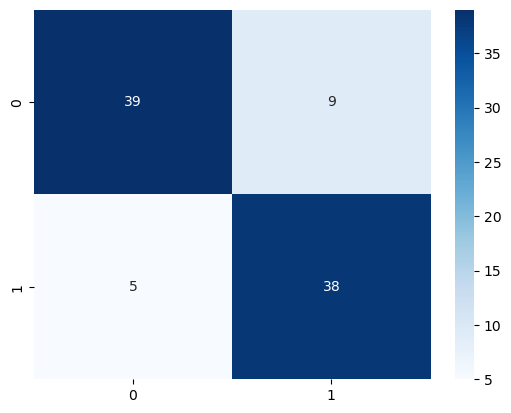

In [33]:

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.show()

Let's compute the accuracy, sensitivity, and specificity of our test predictions.


In [34]:
# Calculate accuracy on test data
acc = model.score(X_test, y_test)

# Calculate true and false positives as well as true and false negatives
tp = sum((y_test==1) & (y_pred==1))
fp = sum((y_test==0) & (y_pred==1))
tn = sum((y_test==0) & (y_pred==0))
fn = sum((y_test==1) & (y_pred==0))

# Calculate sensitivity and specificity
sens = tp/(tp+fp)
spec = tn/(tn+fp)

print(f'Test Accuracy: {acc:.3f}')
print(f'Test Sensitivity: {sens:.3f}')
print(f'Test Specificity: {spec:.3f}')

Test Accuracy: 0.846
Test Sensitivity: 0.809
Test Specificity: 0.812


The test accuracy of 0.846 is slightly lower than the training accuracy of 0.849, which indicates that the model is performing slightly worse on the test set than on the training set. Similarly, the test sensitivity of 0.809 is lower than the training sensitivity of 0.881, suggesting that the model is less sensitive in detecting positive cases in the test set than in the training set.

The test specificity of 0.812 is also lower than the training specificity of 0.914, indicating that the model is less specific in detecting negative cases in the test set than in the training set. Overall, these results suggest that the model may have overfit to the training data and is not generalizing as well to the test data. However, the performance on the test set is still relatively high, indicating that the model is still a good predictor for this problem.


##7. Drawing Conclusions

We will now draw conclusions for our Heart Disease Classification project by specifically addressing the following questions:

Overall, the model seems to make sense when considering its interpretation, as the coefficients for each predictor variable match up with what we might expect based on prior knowledge and research. For example, we would expect age, resting blood pressure, and serum cholesterol levels to be positively associated with the risk of heart disease, while maximum heart rate achieved and being female would be negatively associated with the risk of heart disease. Chest pain, exercise-induced angina, and the number of major vessels colored by fluoroscopy would also be expected to be positively associated with the risk of heart disease. However, there were a few coefficients that were somewhat counterintuitive, such as the negative association between maximum heart rate achieved and heart disease risk. Overall, the model's interpretation aligns with what we might expect, but further research and analysis may be necessary to fully understand the relationship between some of the predictor variables and heart disease risk.
The model seems to predict non-cases (people without heart disease) slightly better than cases (people with heart disease), as indicated by the higher specificity than sensitivity. This could be due to the nature of the problem, as heart disease is a relatively rare condition in the general population, so the model may be biased towards predicting non-cases. It is also possible that the model's performance could be improved with additional data or more advanced modeling techniques.
The accuracy of the model on the test set is 0.846, which means that the model correctly predicts the outcome (presence or absence of heart disease) about 85% of the time. While this accuracy is relatively high, it may not be acceptable for use in an actual clinical setting where false positives and false negatives can have significant consequences. Depending on the specific application, a higher accuracy may be necessary to ensure the safety and well-being of patients. However, the model can still be useful as a screening tool to identify individuals who may be at a higher risk of heart disease and require further evaluation.